# Dimensionality Reduction

## Overview: Test methods of reducing dimensionality of CIC data


---
## Project Workflow:
1. **Step 1: Install and Import Necessary Libraries**
2. **Step 2: Load Data**
3. **Step 3: Get Accuracy for unchanged data**
4. **Step 4: Try PCA**
5. **Step 5: Feature Importance from Random Forest**




# Step 1: Install and Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier




# Step 2: Load Split Data

In [2]:
X_train = pd.read_csv('data/models/X_train.csv')
y_train = pd.read_csv('data/models/y_train.csv')
X_val = pd.read_csv('data/models/X_val.csv')
y_val = pd.read_csv('data/models/y_val.csv')
X_test = pd.read_csv('data/models/X_test.csv')
y_test = pd.read_csv('data/models/y_test.csv')

# Step 3: Get Accuracy for unchanged data

In [3]:
OG_X_test = X_test.copy()
src_mac = X_test.pop('src_mac')

In [4]:
rf = RandomForestClassifier(random_state=5)
rf.fit(X_train, y_train)

test_pred = rf.predict(X_test)

test_accuracy = accuracy_score(y_test, test_pred)

print(f"Test set accuracy: {test_accuracy:.4f}")

c:\Users\Madeline\OneDrive\Documents\Class_Work\new_venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Test set accuracy: 0.9438


# Step 4: Try PCA

In [5]:
pca = PCA(n_components=2) 
train_pca = pca.fit_transform(X_train)
train_pca

array([[-1.7691242 ,  0.49831841],
       [-1.59065917,  0.91837854],
       [-0.63586862,  1.27577714],
       ...,
       [-1.78173451,  0.64025286],
       [-1.39384019, -0.63924377],
       [ 0.12758005,  1.31705815]], shape=(46144, 2))

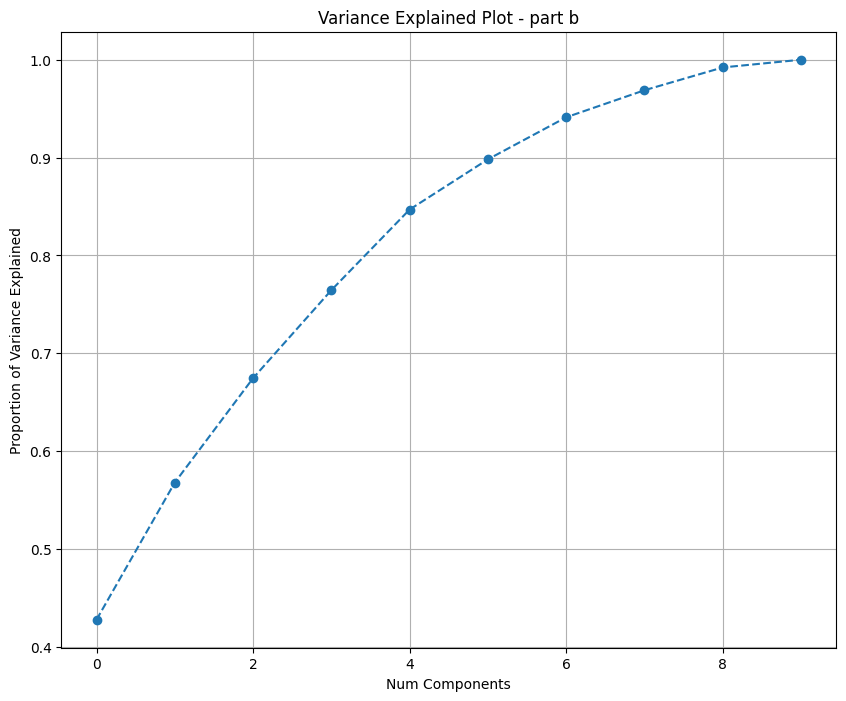

In [6]:
# pca with no number of components gives full range
pca_full = PCA().fit(X_train)

plt.figure(figsize=(10, 8))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Num Components')
plt.ylabel('Proportion of Variance Explained')
plt.title('Variance Explained Plot - part b')
plt.grid(True)

plt.show()

## Test Accuracy on validation

In [9]:
pca = PCA(n_components=6)
train_pca = pca.fit_transform(X_train)
test_pca = pca.transform(X_test)

clf = RandomForestClassifier(random_state=5)
clf.fit(train_pca, y_train)

test_pred = rf.predict(test_pca)

test_accuracy = accuracy_score(y_test, test_pred)

print(f"Test set accuracy: {test_accuracy:.4f}")

c:\Users\Madeline\OneDrive\Documents\Class_Work\new_venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Test set accuracy: 0.8334


## Results:
- accuracy with PCA is less than without
- No PCA needed

# Step 5: Feature Importance from Random Forest


c:\Users\Madeline\OneDrive\Documents\Class_Work\new_venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


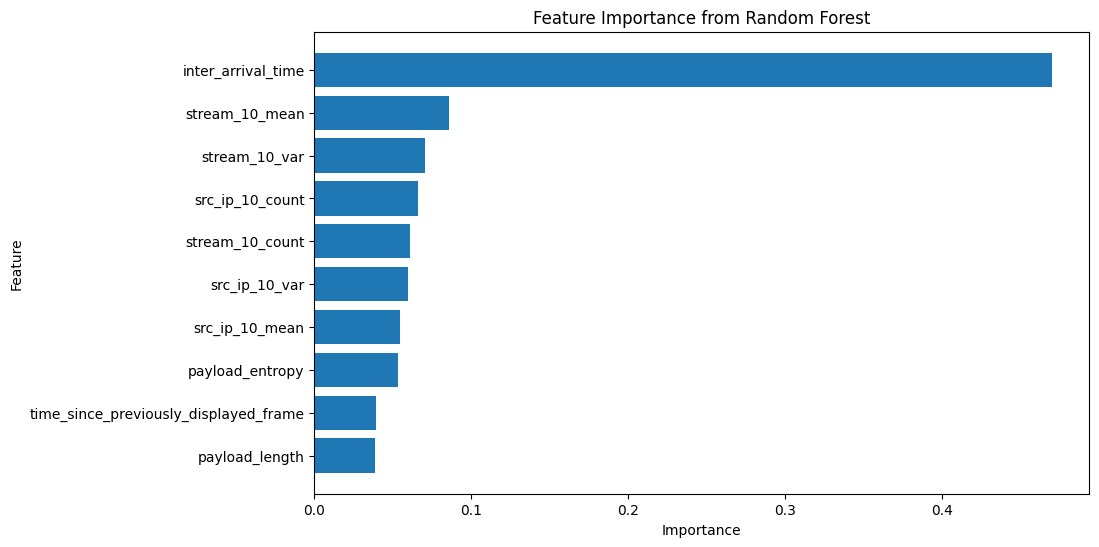

In [10]:
rf = RandomForestClassifier(n_estimators=100, random_state=5)
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [11]:
importance_df

,Feature,Importance
0,inter_arrival_time,0.470245
1,stream_10_mean,0.085684
2,stream_10_var,0.070749
3,src_ip_10_count,0.065862
5,stream_10_count,0.061295
4,src_ip_10_var,0.059954
6,src_ip_10_mean,0.054856
7,payload_entropy,0.053538
8,time_since_previously_displayed_frame,0.039395
9,payload_length,0.038422


## Test Accuracy with only importance > 0 (rounded)

In [ ]:
reduced_X_train = X_train[['inter_arrival_time', 'stream_10_mean', 
                           'stream_10_var', 'src_ip_10_count',
                           'src_ip_10_var', 'stream_10_count', 
                           'src_ip_10_mean', 'payload_entropy',
                           'time_since_previously_displayed_frame',
                           'payload_length']]
reduced_X_val = X_val[['inter_arrival_time', 'stream_10_mean', 
                           'stream_10_var', 'src_ip_10_count',
                           'src_ip_10_var', 'stream_10_count', 
                           'src_ip_10_mean', 'payload_entropy',
                           'time_since_previously_displayed_frame',
                           'payload_length']]
reduced_X_test = X_test[['inter_arrival_time', 'stream_10_mean', 
                           'stream_10_var', 'src_ip_10_count',
                           'src_ip_10_var', 'stream_10_count', 
                           'src_ip_10_mean', 'payload_entropy',
                           'time_since_previously_displayed_frame',
                           'payload_length']]

In [ ]:
# REDUCED TEST
rf = RandomForestClassifier(random_state=5)
rf.fit(reduced_X_train, y_train)

test_pred = rf.predict(reduced_X_test)

test_accuracy = accuracy_score(y_test, test_pred)

print(f"Test set accuracy: {test_accuracy:.4f}")

/Users/madelineshah/Documents/Clones/spring2025_VENV/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Test set accuracy: 0.9451


## Results:
- RF identified most valuable variables, and the accuracy of the RF classifier improved
- we will continue with the reduced dataframe

## Save Data


In [ ]:
# redo test data with src and reduction
reduced_X_test = OG_X_test[['src_mac', 'inter_arrival_time', 'stream_10_mean', 
                           'stream_10_var', 'src_ip_10_count',
                           'src_ip_10_var', 'stream_10_count', 
                           'src_ip_10_mean', 'payload_entropy',
                           'time_since_previously_displayed_frame',
                           'payload_length']]

In [ ]:
reduced_X_train.to_csv('data/models/X_train.csv', index=False)
reduced_X_val.to_csv('data/models/X_val.csv', index=False)
reduced_X_test.to_csv('data/models/X_test.csv', index=False)
